In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
label_encoder = LabelEncoder()
scaler = StandardScaler()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv("/content/drive/My Drive/vqa/Compasbias/finaldata.csv")
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df1=df

In [5]:
df.head()

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,is_recid
0,69,Male,1,0,Other,0.0,1.0,0,0
1,34,Male,3,0,African-American,10.0,1.0,1,1
2,24,Male,4,4,African-American,1.0,1.0,0,1
3,23,Male,8,1,African-American,0.0,1.0,0,0
4,43,Male,1,2,Other,0.0,76.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 7214 non-null   int64  
 1   sex                 7214 non-null   object 
 2   decile_score        7214 non-null   int64  
 3   priors_count        7214 non-null   int64  
 4   race                7214 non-null   object 
 5   days_in_jail        7214 non-null   float64
 6   c_days_from_compas  7214 non-null   float64
 7   is_violent_recid    7214 non-null   int64  
 8   is_recid            7214 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 507.4+ KB




---



---
The below plot show the cross-tabulation for sex and race and show that number of each gender according to each race



Cross Tabulation:
race    African-American  Asian  Caucasian  Hispanic  Native American  Other
sex                                                                         
Female               652      2        567       103                4     67
Male                3044     30       1887       534               14    310


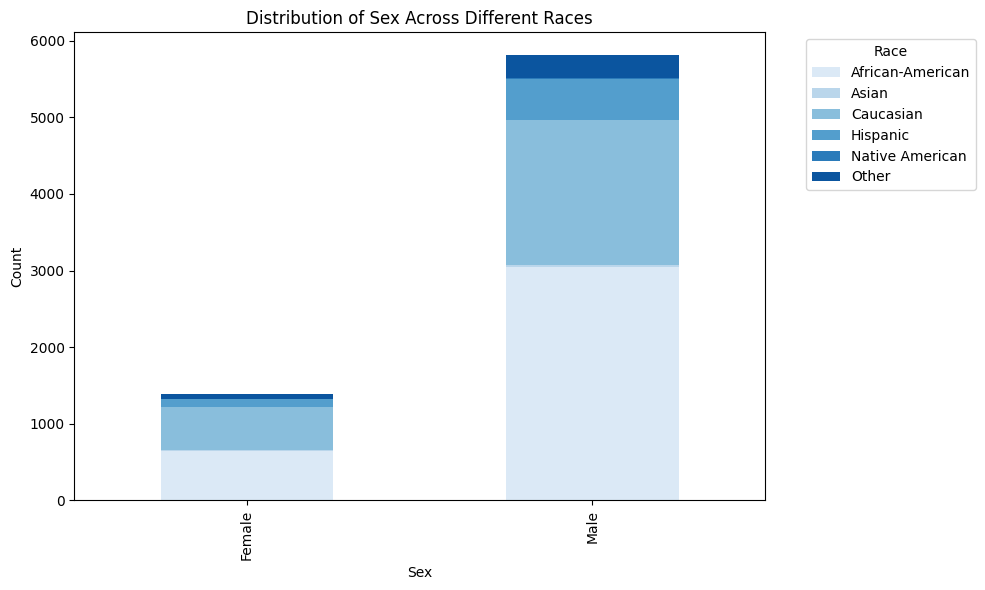

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(df1['sex'], df1['race'])

# Display the cross-tabulation
print("Cross Tabulation:")
print(cross_tab)

colors = sns.color_palette("Blues", n_colors=cross_tab.shape[1])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)
plt.title("Distribution of Sex Across Different Races")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


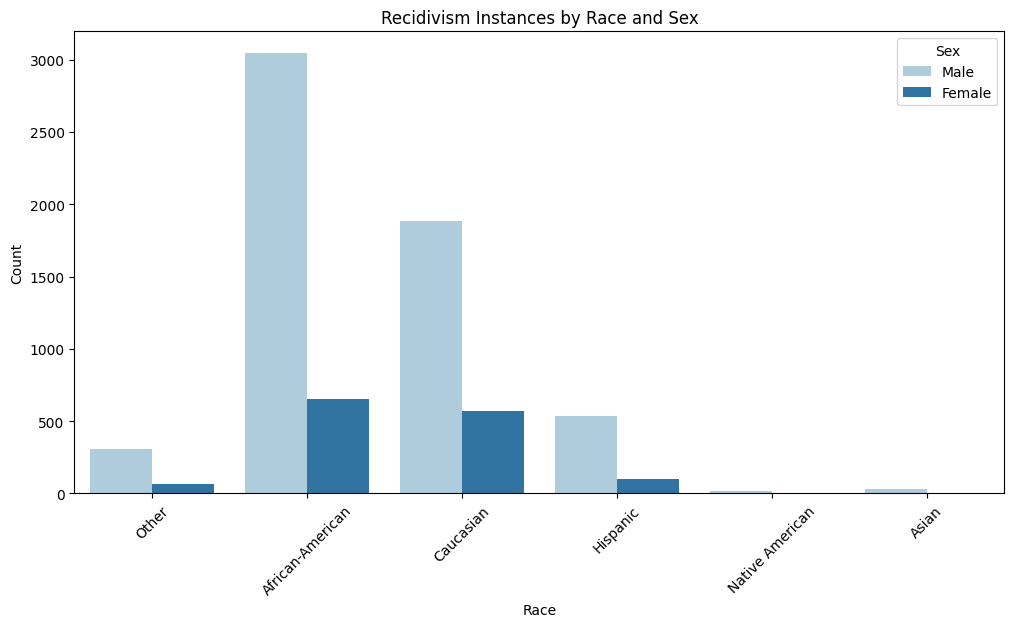

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='race', hue='sex', palette='Paired', hue_order=['Male', 'Female'])
plt.title('Recidivism Instances by Race and Sex')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=45)
plt.show()



---



---



---

According the plots we can underestand that the number of some race groups are very small so we try to remove them and keep only the main categories

In [ ]:
# Remove
filtered_df = df[df['race'].isin(['African-American', 'Caucasian', 'Hispanic'])]
filtered_df

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,is_recid
1,34,Male,3,0,African-American,10.0,1.0,1,1
2,24,Male,4,4,African-American,1.0,1.0,0,1
3,23,Male,8,1,African-American,0.0,1.0,0,0
6,41,Male,6,14,Caucasian,6.0,1.0,0,1
8,39,Female,1,0,Caucasian,2.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
7208,20,Male,9,0,African-American,0.0,1.0,0,0
7209,23,Male,7,0,African-American,1.0,1.0,0,0
7210,23,Male,3,0,African-American,1.0,1.0,0,0
7212,33,Female,2,3,African-American,1.0,1.0,0,0




---



---



---

In this part i try to combine sex column with race column and we can see the result as below

In [ ]:
filtered_df['sex_race'] = filtered_df['sex'] + '-' + filtered_df['race']
filtered_df

,age,sex,decile_score,priors_count,race,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,sex_race
1,34,Male,3,0,African-American,10.0,1.0,1,1,Male-African-American
2,24,Male,4,4,African-American,1.0,1.0,0,1,Male-African-American
3,23,Male,8,1,African-American,0.0,1.0,0,0,Male-African-American
6,41,Male,6,14,Caucasian,6.0,1.0,0,1,Male-Caucasian
8,39,Female,1,0,Caucasian,2.0,1.0,0,0,Female-Caucasian
...,...,...,...,...,...,...,...,...,...,...
7208,20,Male,9,0,African-American,0.0,1.0,0,0,Male-African-American
7209,23,Male,7,0,African-American,1.0,1.0,0,0,Male-African-American
7210,23,Male,3,0,African-American,1.0,1.0,0,0,Male-African-American
7212,33,Female,2,3,African-American,1.0,1.0,0,0,Female-African-American




---



---


and then i try to get dummies the sex-race column for more information about get dummies please see https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

In [ ]:
filtered_df = pd.get_dummies(filtered_df, columns=['sex_race'])



---



---

Then rename the column to meaningfull name

In [ ]:
filtered_df = filtered_df.rename(columns={'sex_race_Female-African-American': 'Female-African-American', 'sex_race_Female-Caucasian': 'Female-Caucasian','sex_race_Female-Hispanic': 'Female-Hispanic','sex_race_Male-African-American': 'Male-African-American',
                        'sex_race_Male-Caucasian':'Male-Caucasian','sex_race_Male-Hispanic':'Male-Hispanic'})




---



---



---
After combining we don't need the sex and race columns so we should drop them


In [ ]:
filtered_df=filtered_df.drop(['sex','race'],axis=1)

In [ ]:
filtered_df.head()

,age,decile_score,priors_count,days_in_jail,c_days_from_compas,is_violent_recid,is_recid,Female-African-American,Female-Caucasian,Female-Hispanic,Male-African-American,Male-Caucasian,Male-Hispanic
1,34,3,0,10.0,1.0,1,1,False,False,False,True,False,False
2,24,4,4,1.0,1.0,0,1,False,False,False,True,False,False
3,23,8,1,0.0,1.0,0,0,False,False,False,True,False,False
6,41,6,14,6.0,1.0,0,1,False,False,False,False,True,False
8,39,1,0,2.0,1.0,0,0,False,True,False,False,False,False


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6787 entries, 1 to 7213
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      6787 non-null   int64  
 1   decile_score             6787 non-null   int64  
 2   priors_count             6787 non-null   int64  
 3   days_in_jail             6787 non-null   float64
 4   c_days_from_compas       6787 non-null   float64
 5   is_violent_recid         6787 non-null   int64  
 6   is_recid                 6787 non-null   int64  
 7   Female-African-American  6787 non-null   bool   
 8   Female-Caucasian         6787 non-null   bool   
 9   Female-Hispanic          6787 non-null   bool   
 10  Male-African-American    6787 non-null   bool   
 11  Male-Caucasian           6787 non-null   bool   
 12  Male-Hispanic            6787 non-null   bool   
dtypes: bool(6), float64(2), int64(5)
memory usage: 464.0 KB


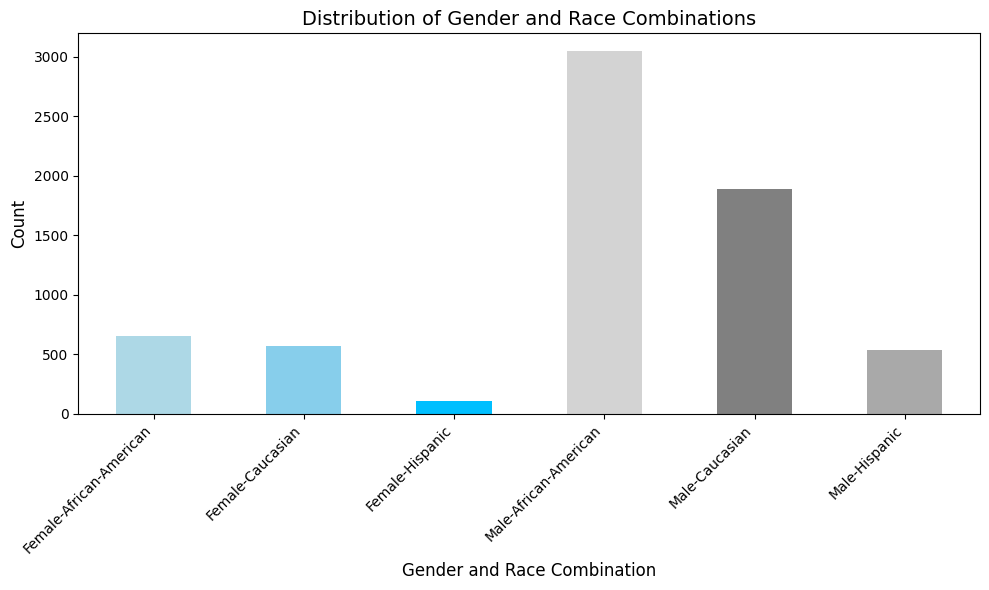

In [ ]:
import matplotlib.pyplot as plt


dummy_columns = ['Female-African-American', 'Female-Caucasian', 'Female-Hispanic',
                 'Male-African-American', 'Male-Caucasian', 'Male-Hispanic']

# Calculate the counts for each dummy variable
dummy_counts = filtered_df[dummy_columns].sum()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
dummy_counts.plot(kind='bar', color=['lightblue', 'skyblue', 'deepskyblue', 'lightgray', 'gray', 'darkgray'
])

# Add titles and labels
plt.title('Distribution of Gender and Race Combinations', fontsize=14)
plt.xlabel('Gender and Race Combination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()




---

Save the dataset as final data that we should predict on it

In [ ]:
filtered_df.to_csv('/content/drive/My Drive/vqa/Compasbias/Combine/combinedata.csv')



---
\
# FeatureImportance
\

---
## Optional part : we can use this part as a comparative approaches that we can use it to compare its result with XAI techniques
we can mention that we try to underestood the importance of each features with target column with this technique and then try to train our ml and dl and then use XAI techniques for gender fairness


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler



---



---

When we want to work with machine learning algorithm we should convert categorical values to numeric that the will become senseable for ml
in the below code we try to lable encodeing our categorical fetuares

In [ ]:
filtered_df['Female-African-Americanale'] = label_encoder.fit_transform(filtered_df['Female-African-American'])
filtered_df['Male-African-American'] = label_encoder.fit_transform(filtered_df['Male-African-American'])
filtered_df['Female-Caucasian'] = label_encoder.fit_transform(filtered_df['Female-Caucasian'])
filtered_df['Male-Caucasian'] = label_encoder.fit_transform(filtered_df['Male-Caucasian'])
filtered_df['Female-Hispanic'] = label_encoder.fit_transform(filtered_df['Female-Hispanic'])
filtered_df['Male-Hispanic'] = label_encoder.fit_transform(filtered_df['Male-Hispanic'])




---



---

Then we should seperate target and input columns

In [ ]:
# Correct way to drop the target column
X = filtered_df.drop(columns=['is_recid'])
Y = filtered_df['is_recid']



---



---
split dataset as test and train dataset for ml algorithm


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



---



---
We should scale input data after splitting it prevent the data leakges


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Please read https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.SelectKBest.html i select diffrent score_func for anova and chi (next approach)

In [ ]:
# 1. Statistical Method: ANOVA
anova_selector = SelectKBest(score_func=f_classif, k='all')
X_train_anova = anova_selector.fit_transform(X_train_scaled, Y_train)

anova_feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA Score': anova_selector.scores_
}).sort_values(by='ANOVA Score', ascending=False)

print("\nANOVA Feature Scores:")
print(anova_feature_scores)


ANOVA Feature Scores:
                       Feature  ANOVA Score
5             is_violent_recid   844.403520
1                 decile_score   695.408307
2                 priors_count   425.295112
0                          age   208.677164
9        Male-African-American   148.238026
3                 days_in_jail    77.947284
4           c_days_from_compas    29.163395
7             Female-Caucasian    28.587346
10              Male-Caucasian    22.593769
11               Male-Hispanic    13.998640
6      Female-African-American    13.338530
12  Female-African-Americanale    13.338530
8              Female-Hispanic     5.999414


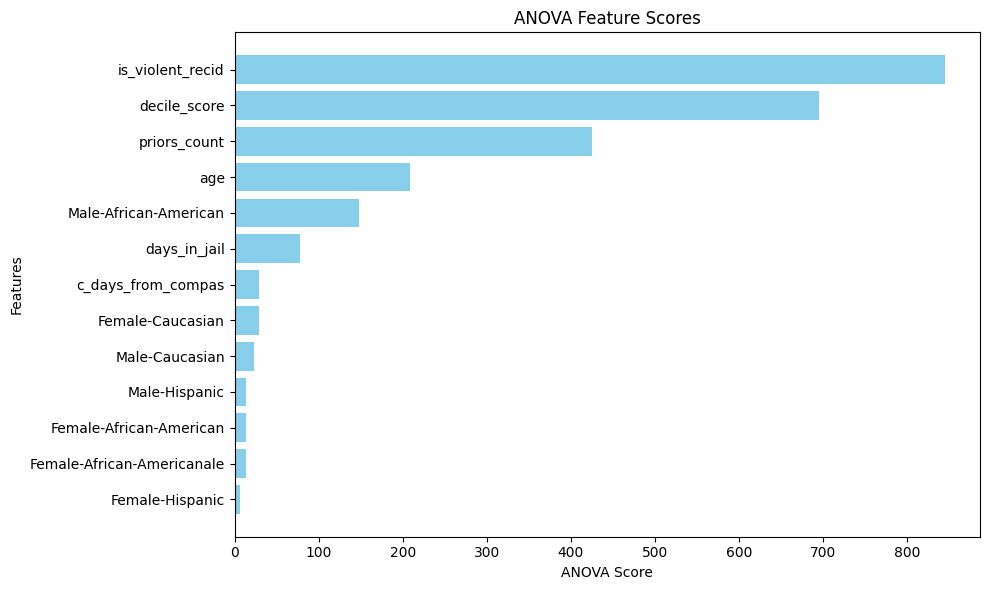

In [ ]:
X_columns = X.columns

# ANOVA Feature Scores
plt.figure(figsize=(10, 6))
plt.barh(anova_feature_scores['Feature'], anova_feature_scores['ANOVA Score'], color='skyblue')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.title('ANOVA Feature Scores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---



---



In [ ]:
# 2. Statistical Method: Chi-Square Test
chi2_selector = SelectKBest(score_func=chi2, k='all')
X_train_chi2 = chi2_selector.fit_transform(X_train[['age', 'decile_score', 'priors_count', 'days_in_jail',
                       'c_days_from_compas','Female-African-American', 'Female-Caucasian', 'Female-Hispanic',
                 'Male-African-American', 'Male-Caucasian', 'Male-Hispanic','is_violent_recid']], Y_train)

chi2_feature_scores = pd.DataFrame({
    'Feature': ['age', 'decile_score', 'priors_count', 'days_in_jail',
                       'c_days_from_compas','Female-African-American', 'Female-Caucasian', 'Female-Hispanic',
                 'Male-African-American', 'Male-Caucasian', 'Male-Hispanic','is_violent_recid'],
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print("\nChi-Square Feature Scores:")
print(chi2_feature_scores)


Chi-Square Feature Scores:
                    Feature    Chi2 Score
4        c_days_from_compas  56572.544809
3              days_in_jail  11144.730196
2              priors_count   2646.308444
1              decile_score   1083.486791
0                       age    821.878036
11         is_violent_recid    647.096508
8     Male-African-American     79.632993
6          Female-Caucasian     26.084782
9            Male-Caucasian     16.268726
10            Male-Hispanic     12.848599
5   Female-African-American     12.006382
7           Female-Hispanic      5.915491


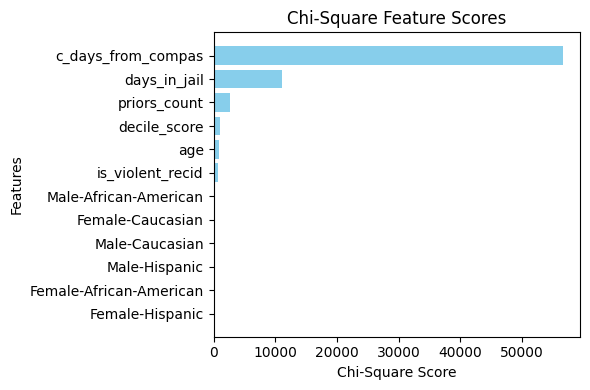

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(chi2_feature_scores['Feature'], chi2_feature_scores['Chi2 Score'], color='skyblue')
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Chi-Square Feature Scores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---



---
## This is the model based


In [ ]:
# 3. Model-Based: Random Forest Feature Importance
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, Y_train)

rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance Score': random_forest.feature_importances_
}).sort_values(by='Importance Score', ascending=False)

print("\nRandom Forest Feature Importances:")
print(rf_feature_importance)


Random Forest Feature Importances:
                       Feature  Importance Score
0                          age          0.259034
2                 priors_count          0.155728
1                 decile_score          0.153751
3                 days_in_jail          0.147309
5             is_violent_recid          0.117842
4           c_days_from_compas          0.111650
9        Male-African-American          0.015181
10              Male-Caucasian          0.011017
7             Female-Caucasian          0.007994
11               Male-Hispanic          0.007763
6      Female-African-American          0.004985
12  Female-African-Americanale          0.004792
8              Female-Hispanic          0.002956


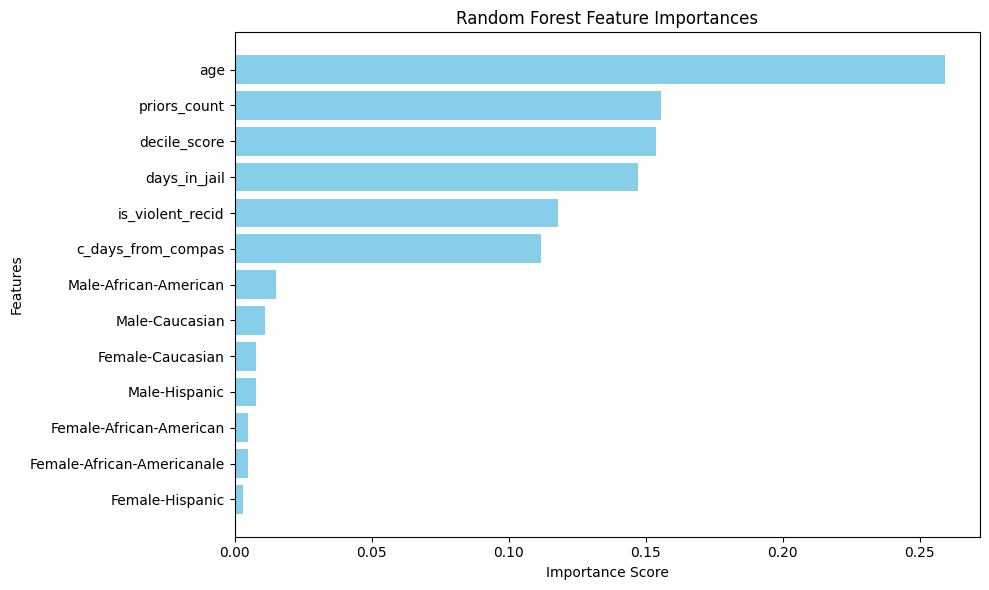

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance Score'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



---



---



In [ ]:
# 4. Recursive Feature Elimination (RFE)
rfe_selector = RFE(random_forest, n_features_to_select=5, step=1)
rfe_selector = rfe_selector.fit(X_train_scaled, Y_train)

rfe_selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe_selector.support_,
    'Ranking': rfe_selector.ranking_
}).sort_values(by='Ranking')

print("\nRFE Selected Features:")
print(rfe_selected_features)


RFE Selected Features:
                       Feature  Selected  Ranking
0                          age      True        1
1                 decile_score      True        1
2                 priors_count      True        1
3                 days_in_jail      True        1
4           c_days_from_compas      True        1
5             is_violent_recid     False        2
9        Male-African-American     False        3
10              Male-Caucasian     False        4
6      Female-African-American     False        5
11               Male-Hispanic     False        6
7             Female-Caucasian     False        7
12  Female-African-Americanale     False        8
8              Female-Hispanic     False        9


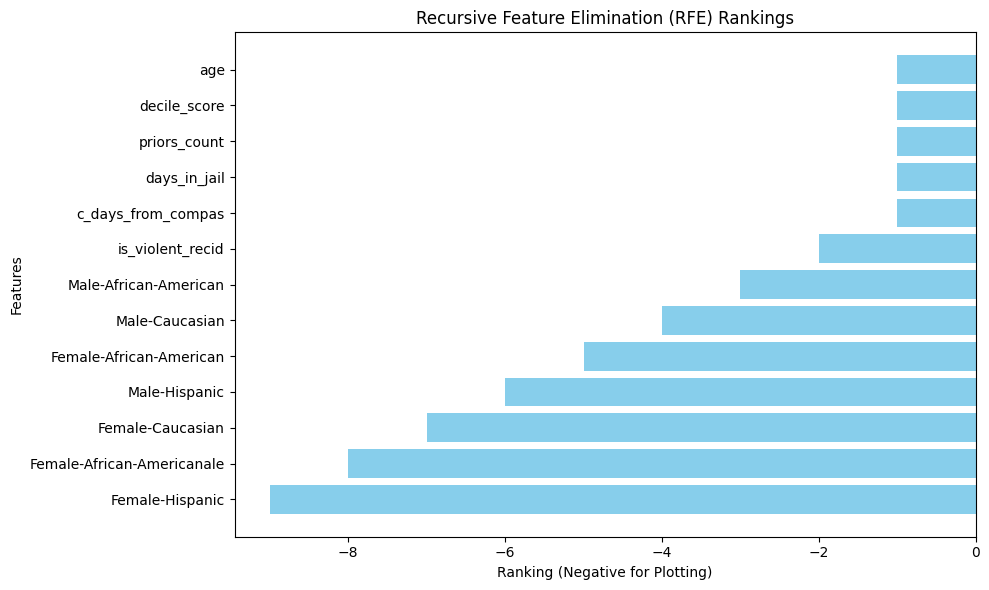

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(rfe_selected_features['Feature'], -rfe_selected_features['Ranking'], color='skyblue')
plt.xlabel('Ranking (Negative for Plotting)')
plt.ylabel('Features')
plt.title('Recursive Feature Elimination (RFE) Rankings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()